# Data Analysis

This notebook presents the analysis of the simulations for the spread of opinions about adhering to Social Distancing in different network scenarios.

The scenarios involve 3 different network topologies:

1. Barabási-Albert
2. Erdos-Renyi
3. Small-world

The interventions involve selecting 10\% of the people in the network and fixing their opinions to 1 (total agreement with social distancing behaviour). The targets are selected based on 3 different network measure strategies:

1. Betweenness centrality
2. Closeness centrality
3. Eigenvector centrality

---

**Last update:** 2020-06-30

**Coder:** Eric Araujo


In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')



import seaborn as sns; sns.set(color_codes=True)
from matplotlib import cm

import get_df as gdf

## Results DF

In [2]:
results_df = gdf.get_results_df()
erdos_df = results_df[results_df.nw_topology == 'erdos-renyi']
barabasi_df = results_df[results_df.nw_topology == 'barabasi-albert']
small_w_df = results_df[results_df.nw_topology == 'small-world']
uniform_df = results_df[results_df.nw_topology == 'uniform']

results_df.head()

,run,beta,sigma,population,nw_topology,step,num_social_distancing,num_not_social_distancing,opinion_avg,opinion_std
0,1,0.1,1,100,erdos-renyi,894,3,97,0.034956,0.002258
1,6,0.1,1,100,erdos-renyi,879,7,93,0.063614,0.164084
2,7,0.1,1,100,erdos-renyi,878,3,97,0.043886,0.096638
3,2,0.1,1,100,erdos-renyi,906,2,98,0.034681,0.003958
4,8,0.1,1,100,erdos-renyi,903,1,99,0.034570,0.004444


## How long the simulation lasted on average?

In [3]:
# LATER: make a graphic with all the strategies and their average duration and std
print("Statistics:\n-----------------------------------------------------------------------------")
print("Topology\t\tMin\t Max\t Diff\t Mean\t\t Std\n-----------------------------------------------------------------------------")
print("Erdos-Renyi\t\t", erdos_df.step.min(), "\t", erdos_df.step.max(), "\t", 
      (erdos_df.step.max() - erdos_df.step.min()), "\t", erdos_df.step.mean(), 
      "\t", round(erdos_df.step.std(),2))
print("Barabasi-Albert\t\t", barabasi_df.step.min(), "\t", barabasi_df.step.max(), "\t", 
      (barabasi_df.step.max() - barabasi_df.step.min()), "\t", round(barabasi_df.step.mean(),2), "\t", 
      round(barabasi_df.step.std(),2))
print("Small-world\t\t", small_w_df.step.min(), "\t", small_w_df.step.max(), "\t", 
      (small_w_df.step.max() - small_w_df.step.min()), "\t", round(small_w_df.step.mean(),2), "\t", 
      round(small_w_df.step.std(),2))
print("Uniform\t\t\t", uniform_df.step.min(), "\t", uniform_df.step.max(), "\t", 
      (uniform_df.step.max() - uniform_df.step.min()), "\t", round(uniform_df.step.mean(),2), "\t", 
      round(uniform_df.step.std(),2))
print("-----------------------------------------------------------------------------")

Statistics:
-----------------------------------------------------------------------------
Topology		Min	 Max	 Diff	 Mean		 Std
-----------------------------------------------------------------------------
Erdos-Renyi		 148 	 8444 	 8296 	 1219.194 	 685.32
Barabasi-Albert		 181 	 4115 	 3934 	 1104.18 	 356.8
Small-world		 162 	 6472 	 6310 	 1180.96 	 544.76
Uniform			 163 	 4413 	 4250 	 1129.2 	 429.84
-----------------------------------------------------------------------------


In [4]:
# Create the new DFs with columns as the combinations of beta and sigma
erdos_steps_df = gdf.get_scenarios_step(erdos_df)
barabasi_steps_df = gdf.get_scenarios_step(barabasi_df)
small_world_steps_df = gdf.get_scenarios_step(small_w_df)
uniform_steps_df = gdf.get_scenarios_step(uniform_df)

Text(0, 0.5, 'Average number of days for the contagion to stabilize')

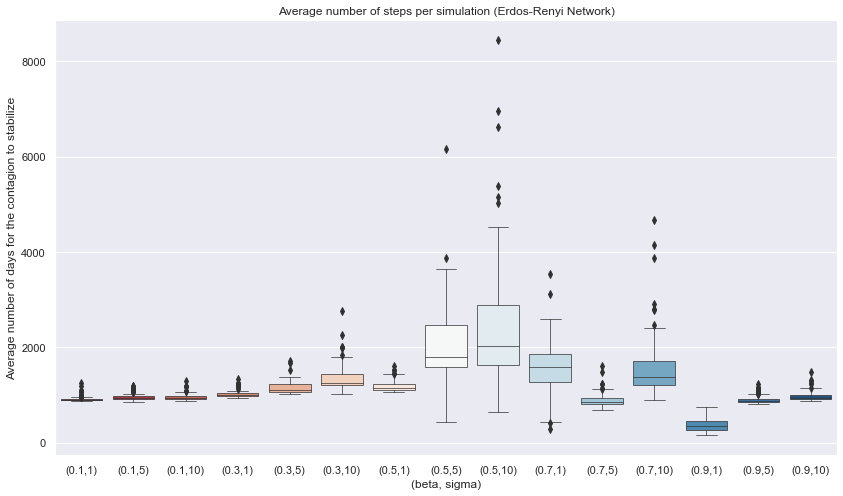

In [5]:
plt.figure(figsize=((14,8)))
g = sns.boxplot(data=erdos_steps_df, palette=sns.color_palette("RdBu", n_colors=15), 
                linewidth=0.7)
g.set_xticklabels(erdos_steps_df.columns)
g.set_title('Average number of steps per simulation (Erdos-Renyi Network)')
g.set_xlabel("(beta, sigma)")
g.set_ylabel("Average number of days for the contagion to stabilize")

Text(0, 0.5, 'Average number of days for the contagion to stabilize')

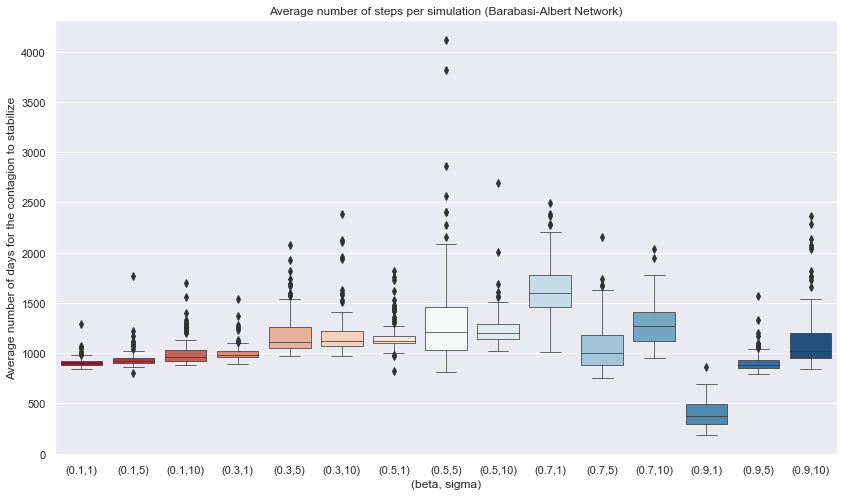

In [6]:
plt.figure(figsize=((14,8)))
g = sns.boxplot(data=barabasi_steps_df, palette=sns.color_palette("RdBu", n_colors=15), 
                linewidth=0.7)
g.set_xticklabels(barabasi_steps_df.columns)
g.set_title('Average number of steps per simulation (Barabasi-Albert Network)')
g.set_xlabel("(beta, sigma)")
g.set_ylabel("Average number of days for the contagion to stabilize")

Text(0, 0.5, 'Average number of days for the contagion to stabilize')

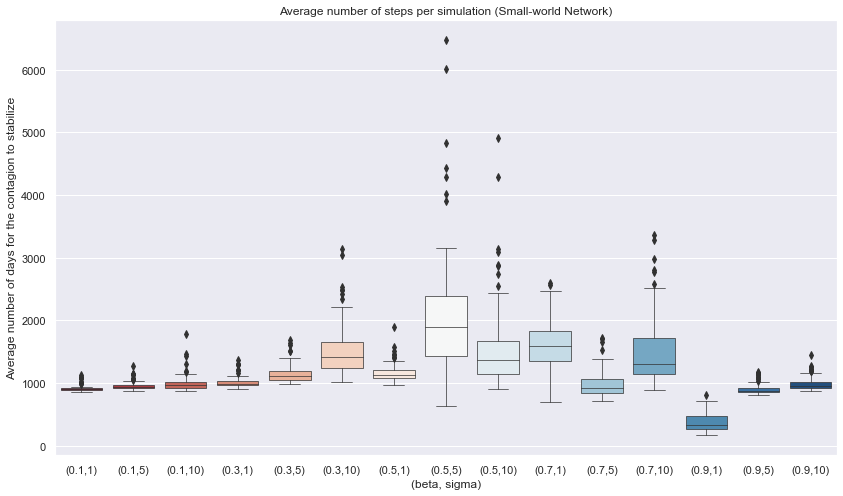

In [7]:
plt.figure(figsize=((14,8)))
g = sns.boxplot(data=small_world_steps_df, palette=sns.color_palette("RdBu", n_colors=15), 
                linewidth=0.7)
g.set_xticklabels(small_world_steps_df.columns)
g.set_title('Average number of steps per simulation (Small-world Network)')
g.set_xlabel("(beta, sigma)")
g.set_ylabel("Average number of days for the contagion to stabilize")

Text(0, 0.5, 'Average number of days for the contagion to stabilize')

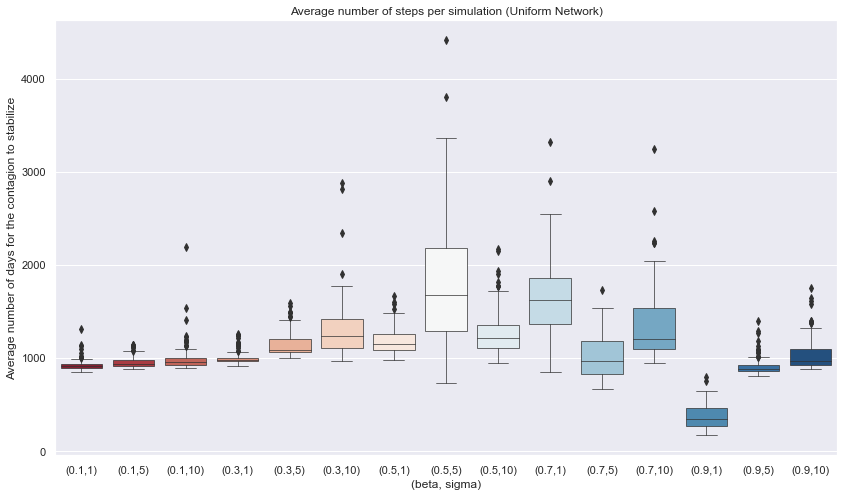

In [8]:
plt.figure(figsize=((14,8)))
g = sns.boxplot(data=uniform_steps_df, palette=sns.color_palette("RdBu", n_colors=15), 
                linewidth=0.7)
g.set_xticklabels(uniform_steps_df.columns)
g.set_title('Average number of steps per simulation (Uniform Network)')
g.set_xlabel("(beta, sigma)")
g.set_ylabel("Average number of days for the contagion to stabilize")

# Opinions

In [9]:
# Get opinions and create columns for each combination of beta and sigma
erdos_opinion_df = gdf.get_opinions(erdos_df)
barabasi_opinion_df = gdf.get_opinions(barabasi_df)
small_world_opinion_df = gdf.get_opinions(small_w_df)
uniform_opinion_df = gdf.get_opinions(uniform_df)

In [10]:
erdos_opinion_df.columns

Index(['(0.1,1)', '(0.1,5)', '(0.1,10)', '(0.3,1)', '(0.3,5)', '(0.3,10)',
       '(0.5,1)', '(0.5,5)', '(0.5,10)', '(0.7,1)', '(0.7,5)', '(0.7,10)',
       '(0.9,1)', '(0.9,5)', '(0.9,10)'],
      dtype='object')

In [11]:
df_list = []
for col in erdos_opinion_df.columns:
    df_list.append(pd.DataFrame([erdos_opinion_df[col], 
                                 barabasi_opinion_df[col], 
                                 small_world_opinion_df[col], 
                                 uniform_opinion_df[col],
                                ], index=['Erdos-Renyi {}'.format(col), 'Barabasi-Albert {}'.format(col), 
                                          'Small-world {}'.format(col), 'Lattice-2D {}'.format(col)]).T)

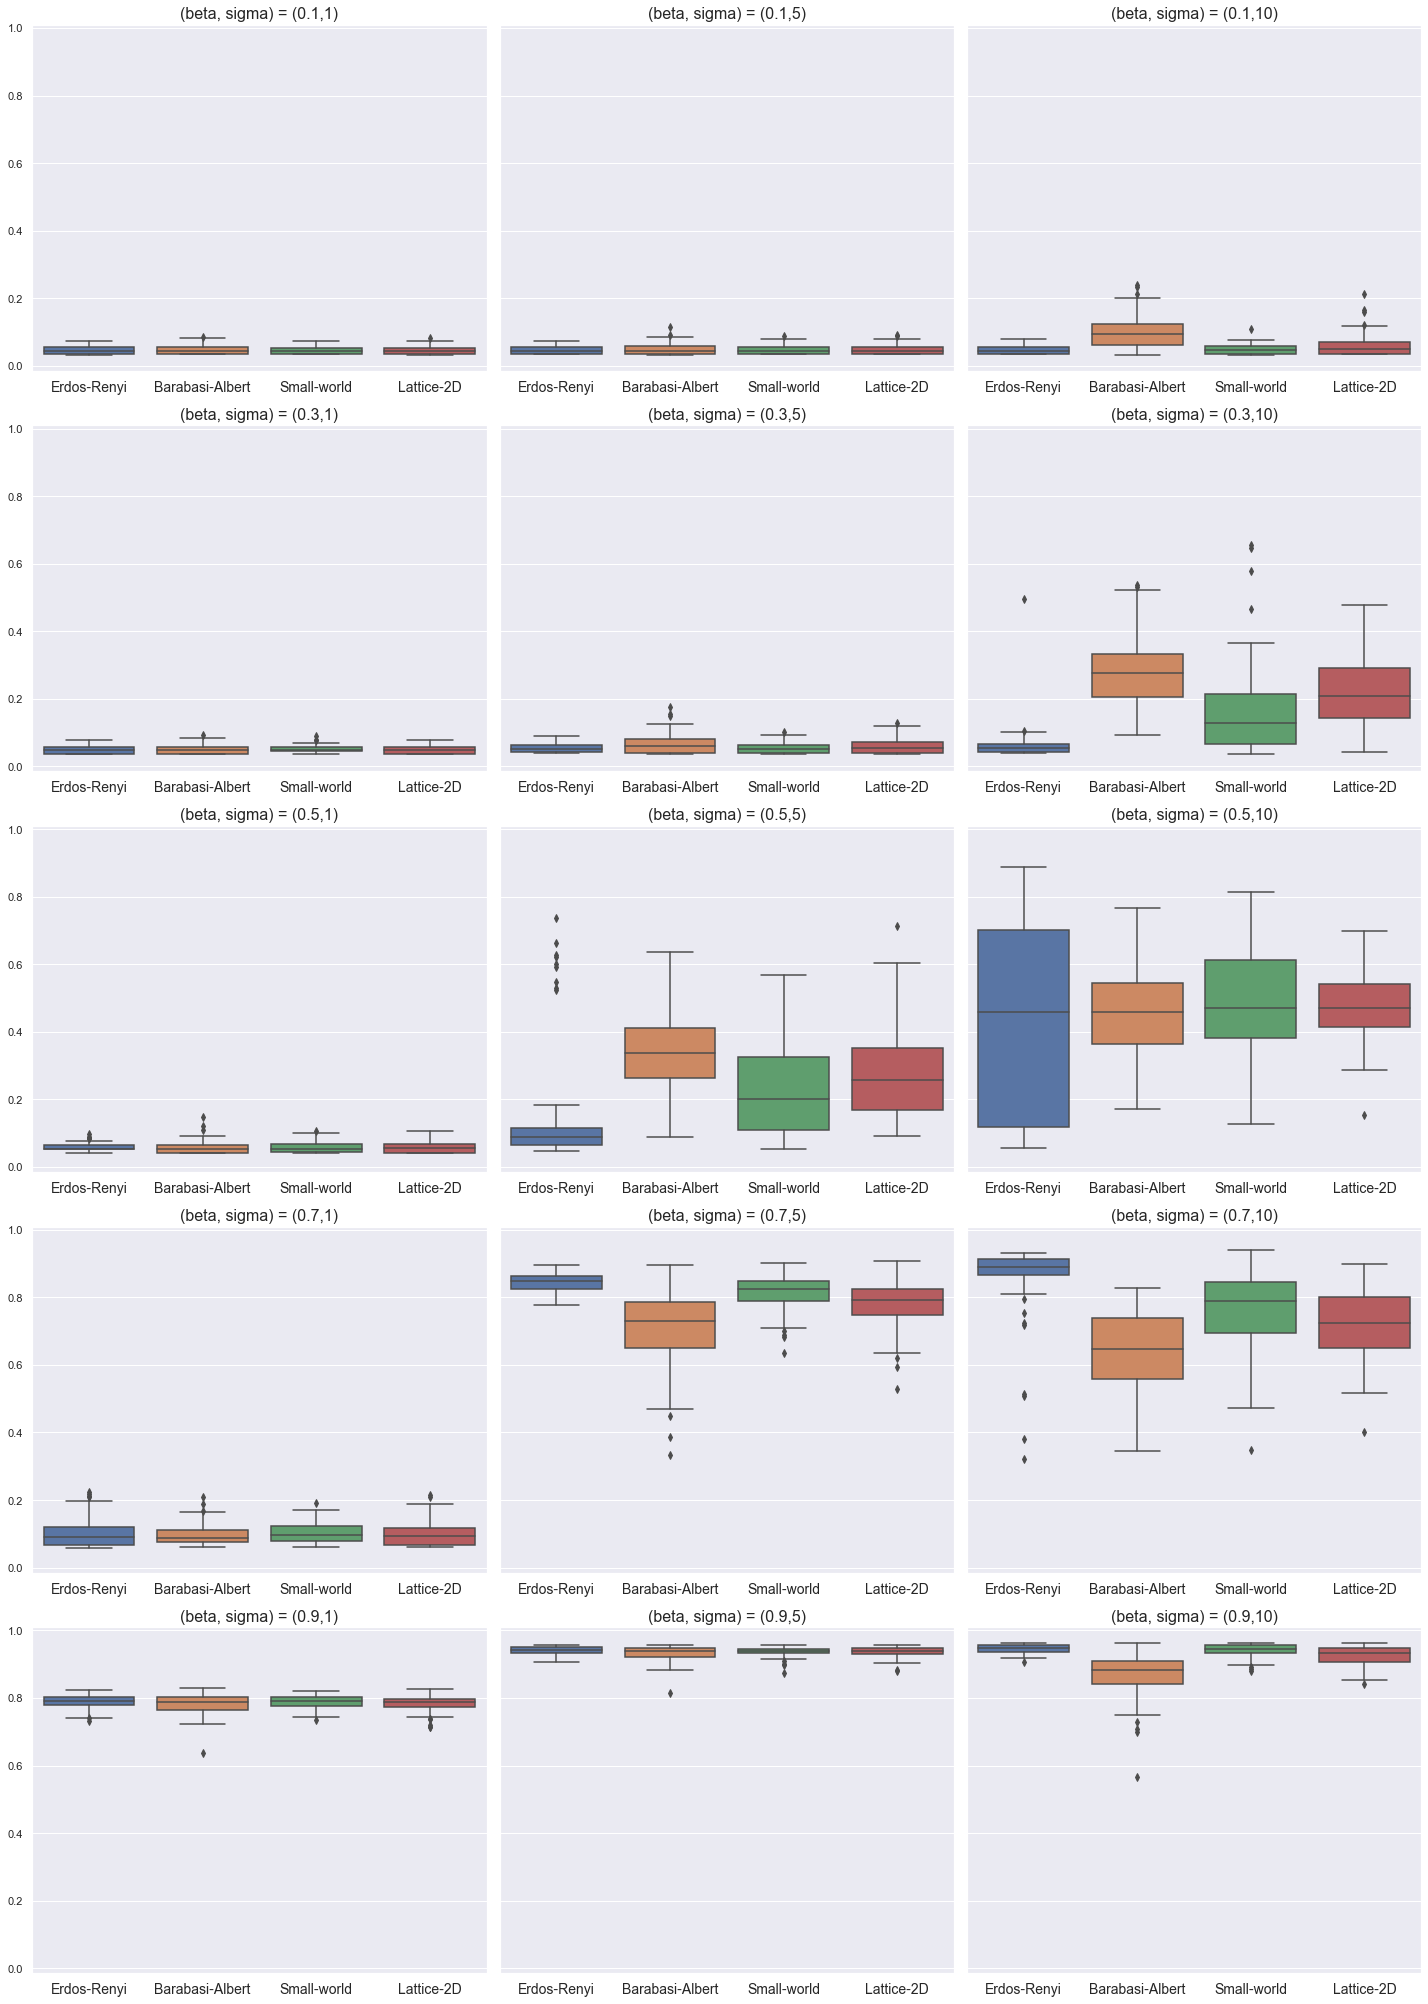

In [12]:
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=((20,28)), sharey=True)

for i in range(5):
    for j in range(3):
        sns.boxplot(data=df_list[i*3+j], ax=axes[i,j])
        axes[i,j].set_xticklabels([x.split(sep=" ")[0] for x in df_list[i*3+j].columns], size=14)
        axes[i,j].set_title("(beta, sigma) = " + df_list[i*3+j].columns[0].split(sep=" ")[1], size=16)
        #axes[i,j].set_title("Average Opinion (sigma, beta) = ({}).".format(erdos_opinion_df.columns[i*3+j]), size=14)
fig.tight_layout()


# Social Distancing

In [13]:
erdos_lock_df = gdf.get_perc_adherence(erdos_df)
barabasi_lock_df = gdf.get_perc_adherence(barabasi_df)
small_world_lock_df = gdf.get_perc_adherence(small_w_df)
uniform_lock_df = gdf.get_perc_adherence(uniform_df)

In [14]:
lock_list = []
for col in erdos_lock_df.columns:
    lock_list.append(pd.DataFrame([erdos_lock_df[col], 
                                 barabasi_lock_df[col], 
                                 small_world_lock_df[col], 
                                 #uniform_lock_df[col],
                                ], index=['Erdos-Renyi {}'.format(col), 'Barabasi-Albert {}'.format(col), 
                                          'Small-world {}'.format(col), 
                                          #'Lattice-2D {}'.format(col)
                                         ]).T)

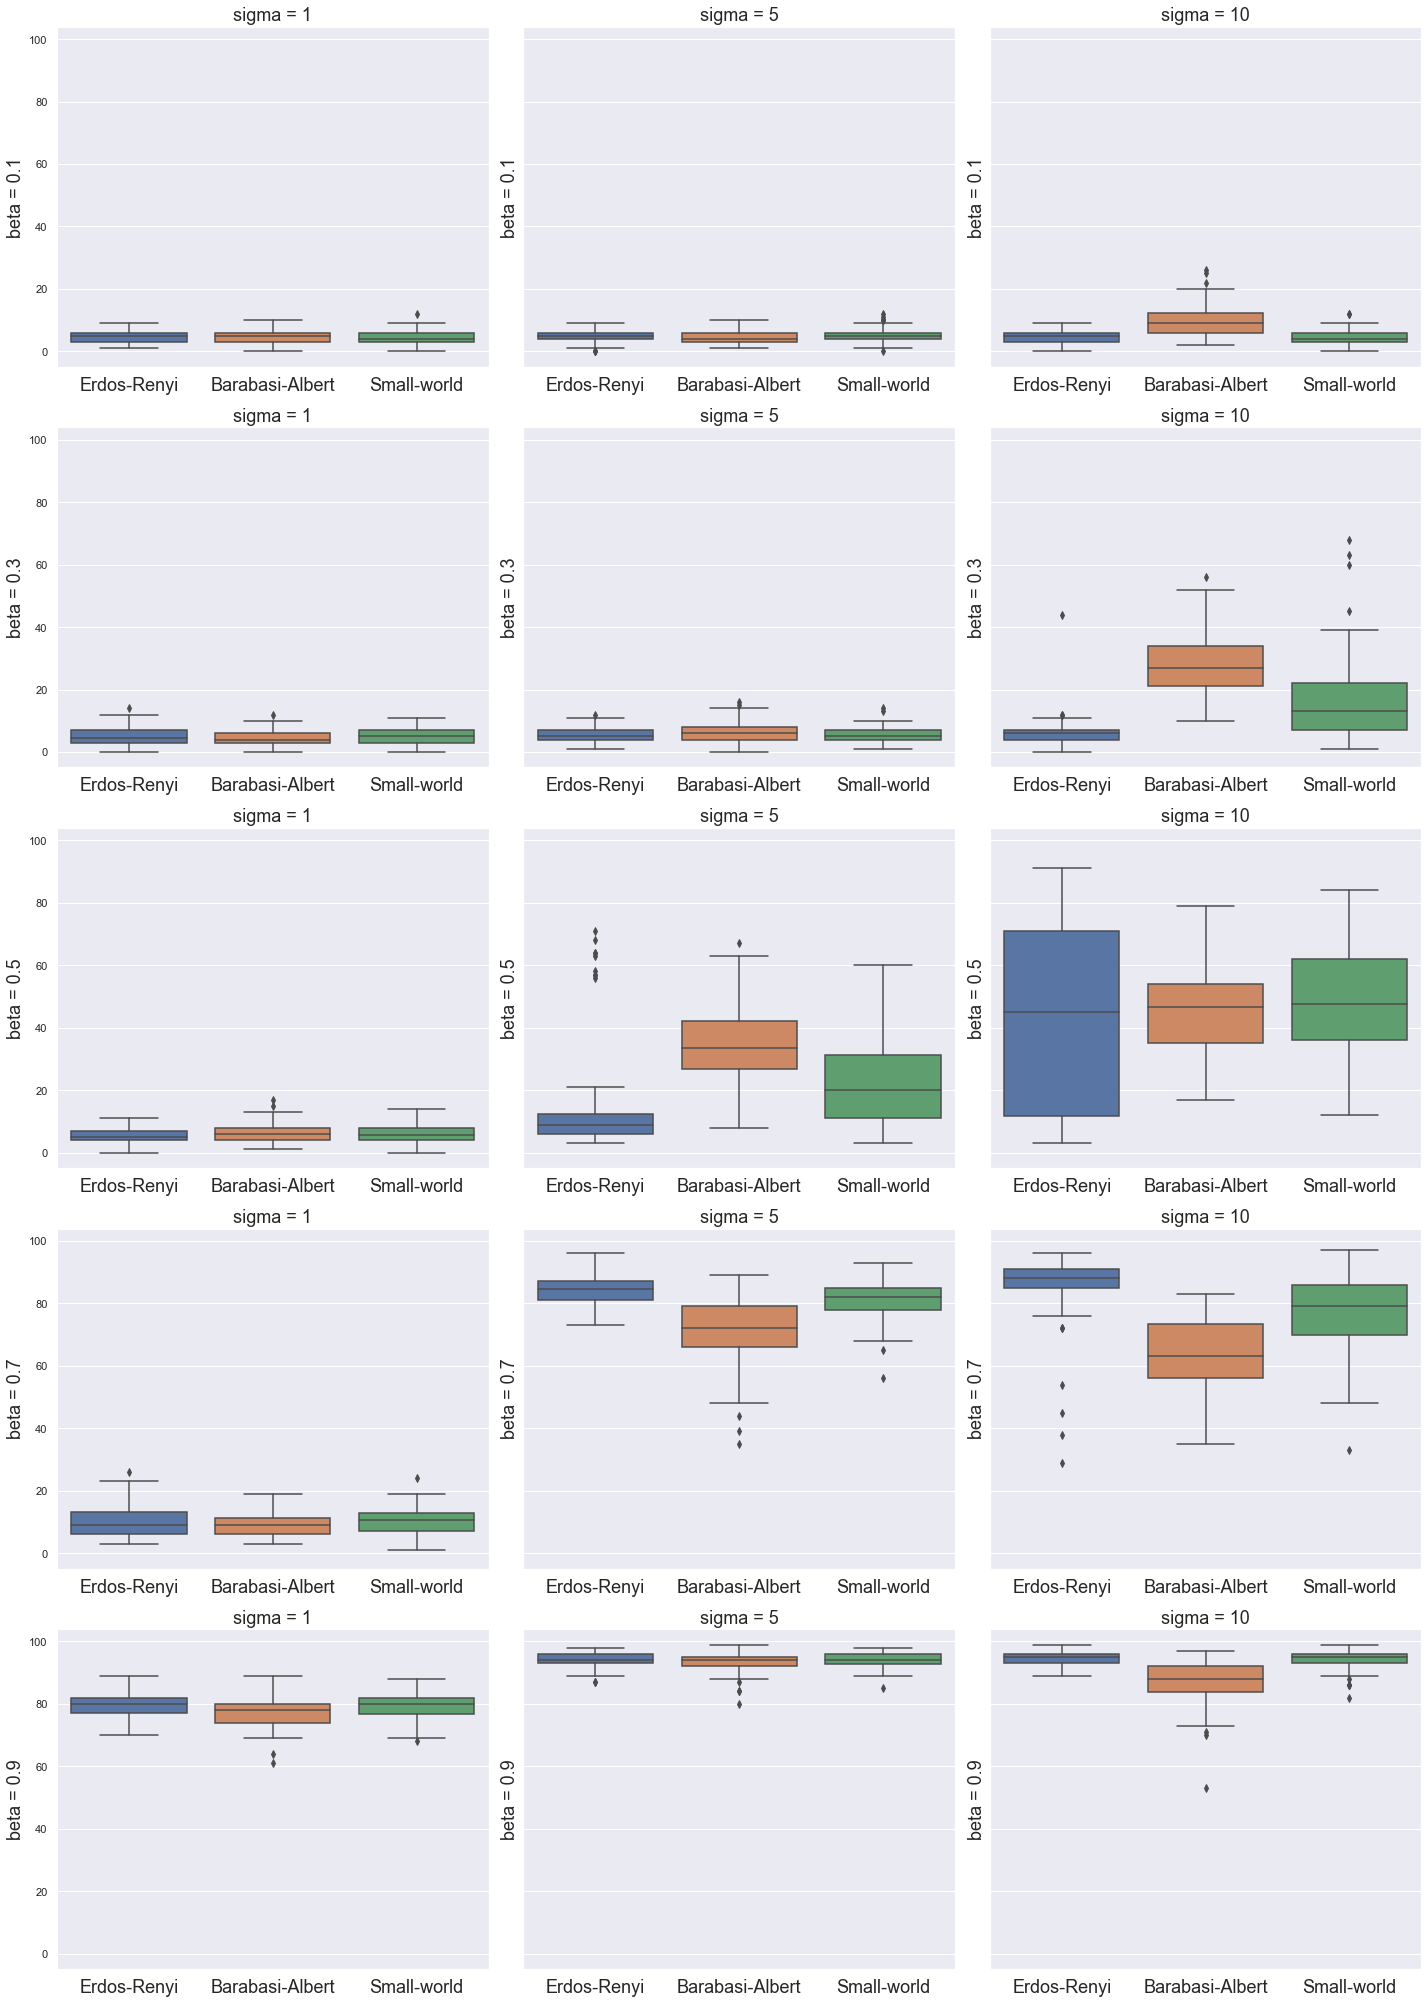

In [15]:
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=((20,28)), sharey=True)

for i in range(5):
    for j in range(3):
        sns.boxplot(data=lock_list[i*3+j], ax=axes[i,j])
        axes[i,j].set_xticklabels([x.split(sep=" ")[0] for x in lock_list[i*3+j].columns], size=18)
        axes[i,j].set_title("sigma = " + 
                            lock_list[i*3+j].columns[0].split(sep=" ")[1].split(sep=",")[1].strip("()"), size=18)
        axes[i,j].set_ylabel("beta = "+ 
                             lock_list[i*3+j].columns[0].split(sep=" ")[1].split(sep=",")[0].strip("()"), size=18)
        #axes[i,j].set_title("Average Opinion (sigma, beta) = ({}).".format(erdos_opinion_df.columns[i*3+j]), size=14)
fig.tight_layout()


# 3D Plot

In [16]:
all_3d_df = pd.DataFrame()
all_3d_df['x'] = results_df.beta
all_3d_df['y'] = results_df.sigma
all_3d_df['z'] = results_df.opinion_avg
all_3d_df['label'] = results_df.nw_topology
all_3d_df

erdos_3d_df = pd.DataFrame()
erdos_3d_df['x'] = erdos_df.beta
erdos_3d_df['y'] = erdos_df.sigma
erdos_3d_df['z'] = erdos_df.opinion_avg
erdos_3d_df['label'] = erdos_df.nw_topology

barabasi_3d_df = pd.DataFrame()
barabasi_3d_df['x'] = barabasi_df.beta
barabasi_3d_df['y'] = barabasi_df.sigma
barabasi_3d_df['z'] = barabasi_df.opinion_avg
barabasi_3d_df['label'] = barabasi_df.nw_topology

small_3d_df = pd.DataFrame()
small_3d_df['x'] = small_w_df.beta
small_3d_df['y'] = small_w_df.sigma
small_3d_df['z'] = small_w_df.opinion_avg
small_3d_df['label'] = small_w_df.nw_topology

uniform_3d_df = pd.DataFrame()
uniform_3d_df['x'] = uniform_df.beta
uniform_3d_df['y'] = uniform_df.sigma
uniform_3d_df['z'] = uniform_df.opinion_avg
uniform_3d_df['label'] = uniform_df.nw_topology

<Figure size 864x864 with 0 Axes>

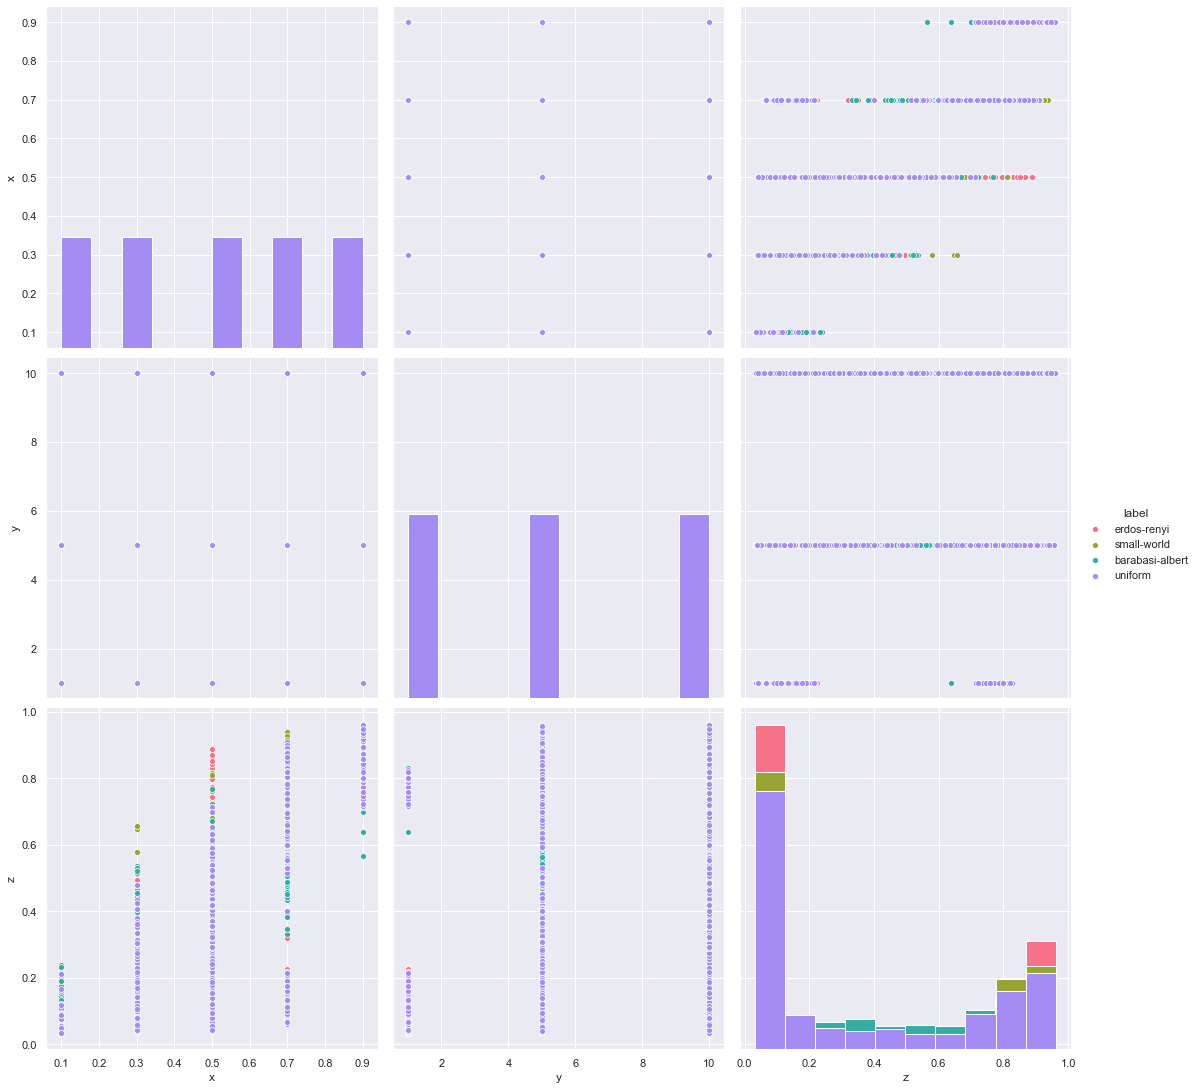

In [17]:
ax=plt.figure(figsize=((12,12)))
sns.pairplot(all_3d_df, height=5, aspect=1., hue='label', diag_kind="hist", palette="husl" )
#palette=sns.cubehelix_palette(5), 

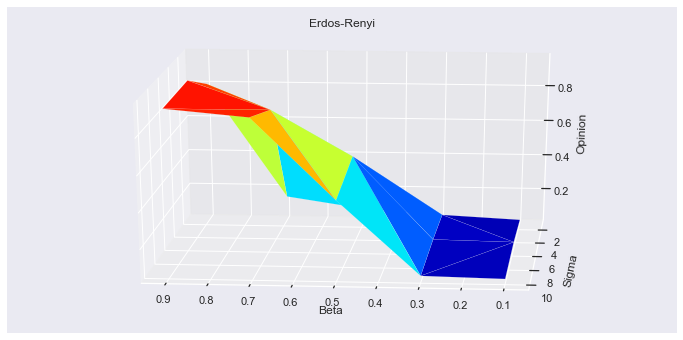

In [18]:

fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(111, projection='3d')

x = np.array(erdos_3d_df["x"])
y = np.array(erdos_3d_df["y"])
z = np.array(erdos_3d_df["z"])


surf = ax.plot_trisurf(x, y, z, cmap=cm.jet, linewidth=0.1, vmin=0, vmax=1)

ax.set_title("Erdos-Renyi")
ax.set_xlabel('Beta')
ax.set_ylabel('Sigma')
ax.set_zlabel('Opinion')

ax.view_init(20, 95)


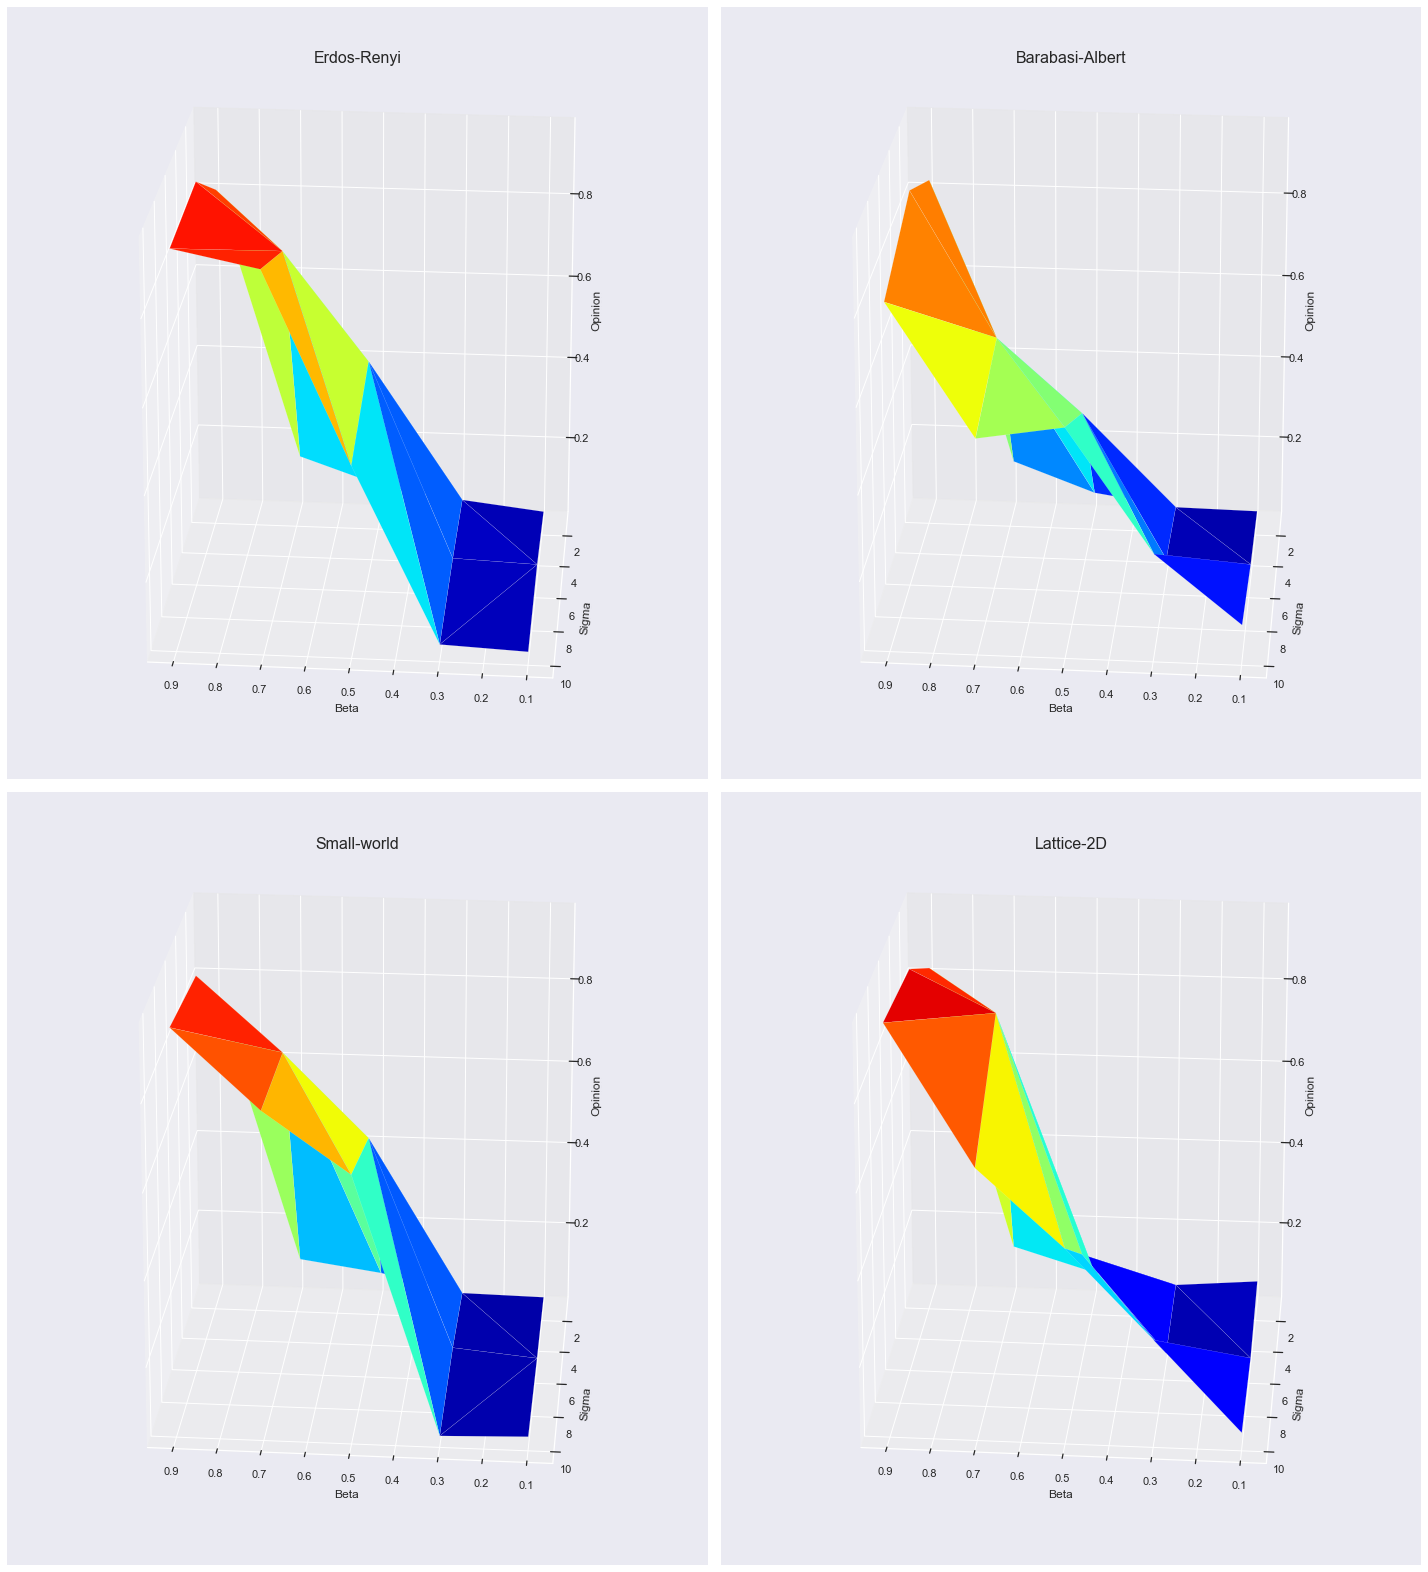

In [19]:
#fig, axes = plt.subplots(nrows=2, ncols=2, figsize=((20,22)))
fig = plt.figure(figsize=((20,22)))

ax = fig.add_subplot(2, 2, 1, projection='3d')
#fig = plt.figure(figsize=(12, 6))
#ax = fig.add_subplot(111, projection='3d')

x = np.array(erdos_3d_df["x"])
y = np.array(erdos_3d_df["y"])
z = np.array(erdos_3d_df["z"])

surf = ax.plot_trisurf(x, y, z, cmap=cm.jet, linewidth=0.1, vmin=0, vmax=1)
ax.set_title("Erdos-Renyi", fontsize=16)
ax.set_xlabel('Beta')
ax.set_ylabel('Sigma')
ax.set_zlabel('Opinion')

ax.view_init(20, 95)

ax = fig.add_subplot(2, 2, 2, projection='3d')
x = np.array(barabasi_3d_df["x"])
y = np.array(barabasi_3d_df["y"])
z = np.array(barabasi_3d_df["z"])

surf = ax.plot_trisurf(x, y, z, cmap=cm.jet, linewidth=0.1, vmin=0, vmax=1)
ax.set_title("Barabasi-Albert", fontsize=16)
ax.set_xlabel('Beta')
ax.set_ylabel('Sigma')
ax.set_zlabel('Opinion')

ax.view_init(20, 95)

##### Small world
ax = fig.add_subplot(2, 2, 3, projection='3d')
x = np.array(small_3d_df["x"])
y = np.array(small_3d_df["y"])
z = np.array(small_3d_df["z"])

surf = ax.plot_trisurf(x, y, z, cmap=cm.jet, linewidth=0.1, vmin=0, vmax=1)
ax.set_title("Small-world", fontsize=16)
ax.set_xlabel('Beta')
ax.set_ylabel('Sigma')
ax.set_zlabel('Opinion')

ax.view_init(20, 95)

##### Lattice-2D
ax = fig.add_subplot(2, 2, 4, projection='3d')
x = np.array(uniform_3d_df["x"])
y = np.array(uniform_3d_df["y"])
z = np.array(uniform_3d_df["z"])

surf = ax.plot_trisurf(x, y, z, cmap=cm.jet, linewidth=0.1, vmin=0, vmax=1)
ax.set_title("Lattice-2D", fontsize=16)
ax.set_xlabel('Beta')
ax.set_ylabel('Sigma')
ax.set_zlabel('Opinion')

ax.view_init(20, 95)

plt.tight_layout()

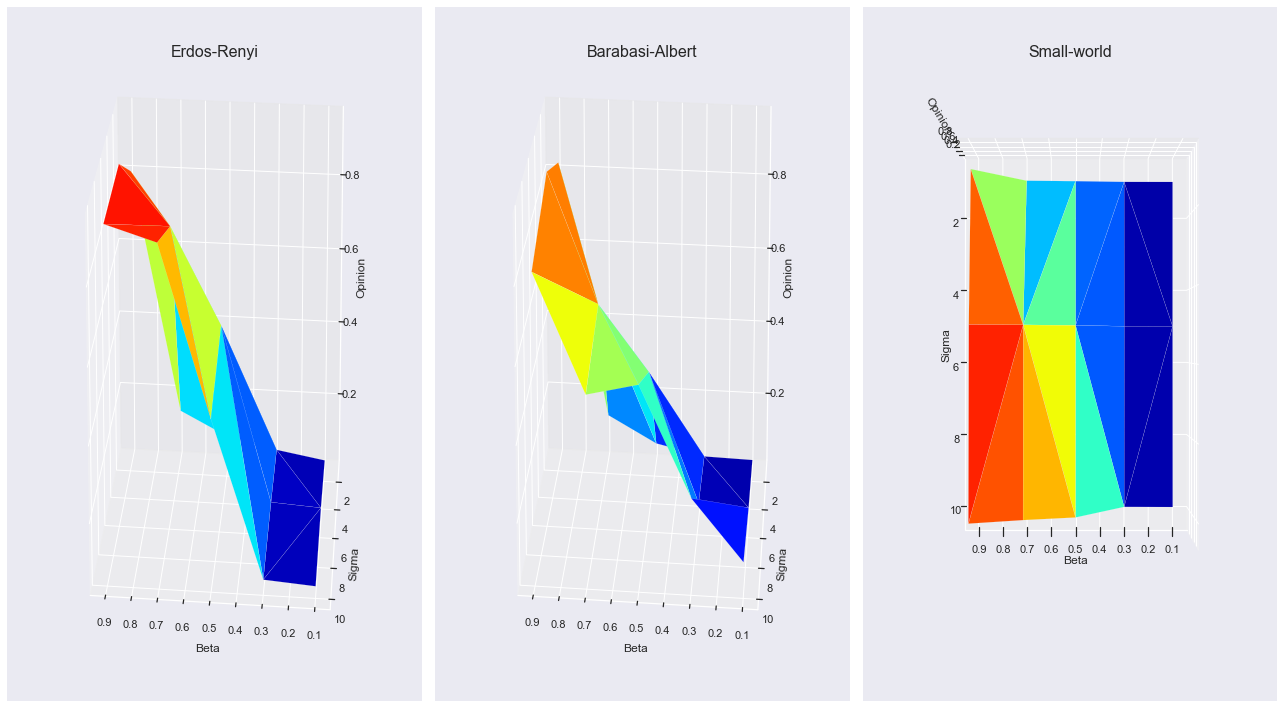

In [20]:
#fig, axes = plt.subplots(nrows=2, ncols=2, figsize=((20,22)))
fig = plt.figure(figsize=((18,10)))

ax = fig.add_subplot(1, 3, 1, projection='3d')
#fig = plt.figure(figsize=(12, 6))
#ax = fig.add_subplot(111, projection='3d')

x = np.array(erdos_3d_df["x"])
y = np.array(erdos_3d_df["y"])
z = np.array(erdos_3d_df["z"])

surf = ax.plot_trisurf(x, y, z, cmap=cm.jet, linewidth=0.1, vmin=0, vmax=1)
ax.set_title("Erdos-Renyi", fontsize=16)
ax.set_xlabel('Beta')
ax.set_ylabel('Sigma')
ax.set_zlabel('Opinion')

ax.view_init(20, 95)

ax = fig.add_subplot(1, 3, 2, projection='3d')
x = np.array(barabasi_3d_df["x"])
y = np.array(barabasi_3d_df["y"])
z = np.array(barabasi_3d_df["z"])

surf = ax.plot_trisurf(x, y, z, cmap=cm.jet, linewidth=0.1, vmin=0, vmax=1)
ax.set_title("Barabasi-Albert", fontsize=16)
ax.set_xlabel('Beta')
ax.set_ylabel('Sigma')
ax.set_zlabel('Opinion')

ax.view_init(20, 95)

##### Small world
ax = fig.add_subplot(1, 3, 3, projection='3d')
x = np.array(small_3d_df["x"])
y = np.array(small_3d_df["y"])
z = np.array(small_3d_df["z"])

surf = ax.plot_trisurf(x, y, z, cmap=cm.jet, linewidth=0.1, vmin=0, vmax=1)
ax.set_title("Small-world", fontsize=16)
ax.set_xlabel('Beta')
ax.set_ylabel('Sigma')
ax.set_zlabel('Opinion')

ax.view_init(90, 90)

plt.tight_layout()

# Interventions

beta 0.1 0.5 0.9

sigma 1 5 10

"nw-type" "erdos-renyi" "small-world" "barabasi-albert"

"intervention-type" "eigen" "betweenness" "closeness"

"perc-interventions" 10

In [21]:
interv_results_df = gdf.get_interventions_df()
interv_results_df.head(2)

,run,beta,sigma,population,nw_topology,interv_type,perc-interventions,step,num_social_distancing,num_not_social_distancing,opinion_avg,opinion_std
0,8,0.1,1,100,erdos-renyi,eigen,10,838,11,89,0.132369,0.290758
1,3,0.1,1,100,erdos-renyi,eigen,10,833,13,87,0.133370,0.290355


### Erdos-Renyi

In [22]:
interv_erdos_df = interv_results_df[interv_results_df.nw_topology == 'erdos-renyi']
interv_erdos_df.head(2)

,run,beta,sigma,population,nw_topology,interv_type,perc-interventions,step,num_social_distancing,num_not_social_distancing,opinion_avg,opinion_std
0,8,0.1,1,100,erdos-renyi,eigen,10,838,11,89,0.132369,0.290758
1,3,0.1,1,100,erdos-renyi,eigen,10,833,13,87,0.133370,0.290355


In [23]:
set(interv_results_df.interv_type)

{'betweenness', 'closeness', 'eigen'}

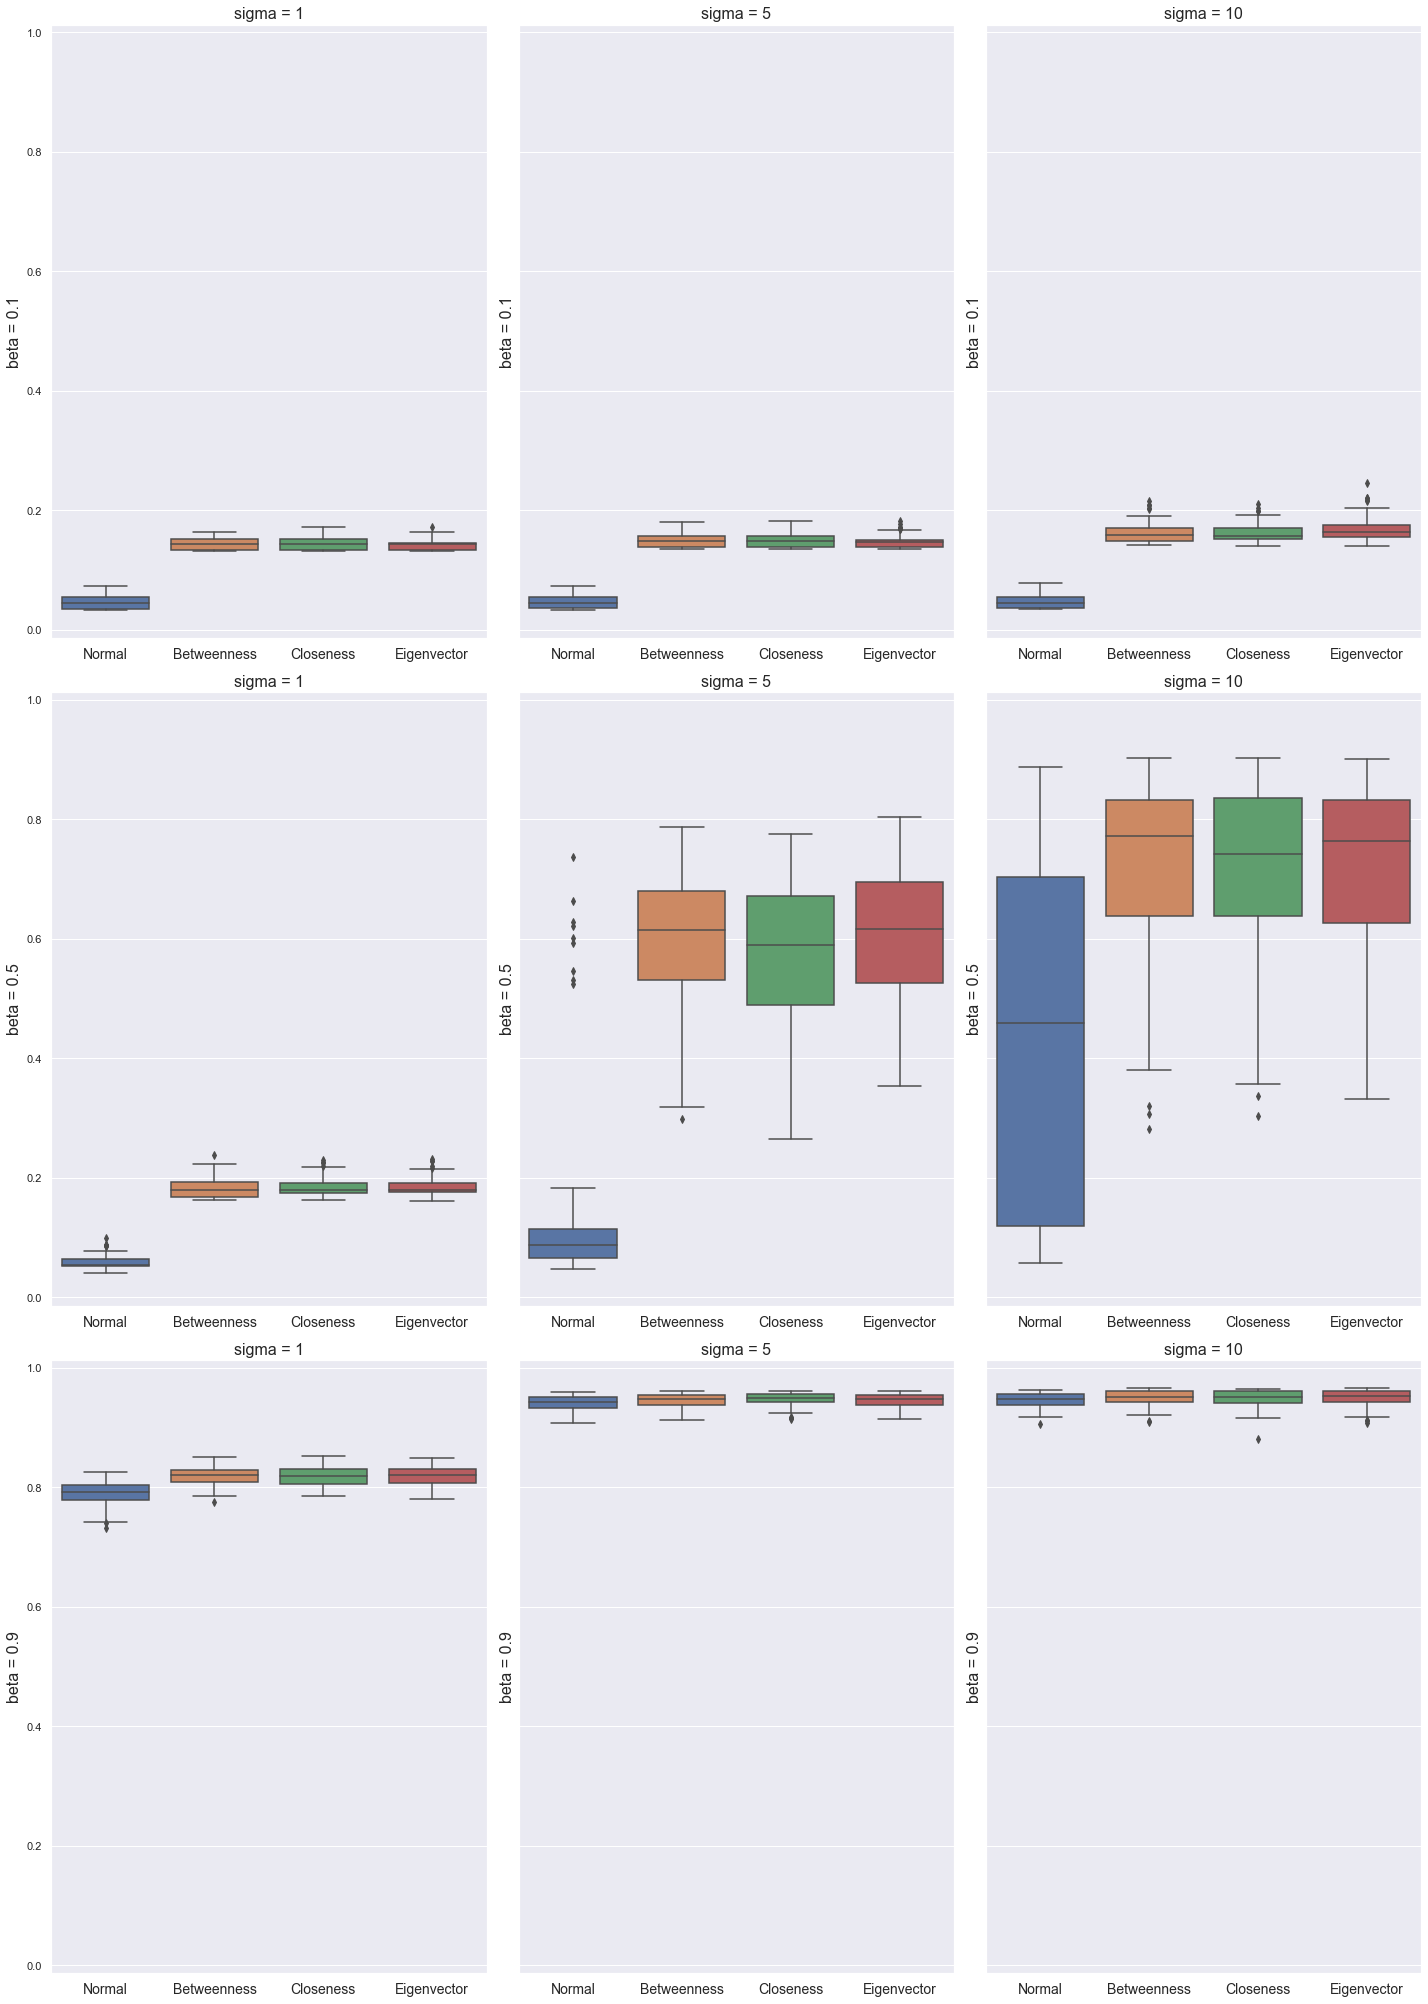

In [24]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=((20,28)), sharey=True)

beta_list = [0.1, 0.5, 0.9]
sigma_list = [1, 5, 10]
for i in range(3):
    for j in range(3):
        temp_df = pd.DataFrame([erdos_df[(erdos_df.beta == beta_list[i]) & 
                                         (erdos_df.sigma == sigma_list[j])].reset_index()['opinion_avg'],
                                interv_erdos_df[(interv_erdos_df.beta == beta_list[i]) &
                                                (interv_erdos_df.sigma == sigma_list[j]) &                                             
                                                (interv_erdos_df.interv_type=="betweenness")
                                               ].reset_index()['opinion_avg'],
                                interv_erdos_df[(interv_erdos_df.beta == beta_list[i]) & 
                                                (interv_erdos_df.sigma == sigma_list[j]) & 
                                                (interv_erdos_df.interv_type=="closeness")
                                               ].reset_index()['opinion_avg'],
                                interv_erdos_df[(interv_erdos_df.beta == beta_list[i]) & 
                                                (interv_erdos_df.sigma == sigma_list[j]) & 
                                                (interv_erdos_df.interv_type=="eigen")
                                               ].reset_index()['opinion_avg']
                               ], index=['Normal', 'Betweenness', 'Closeness', 'Eigenvector']).T
        sns.boxplot(data=temp_df, ax=axes[i,j])
        axes[i,j].set_xticklabels([x.split(sep=" ")[0] for x in temp_df.columns], size=14)
        axes[i,j].set_title("sigma = {}".format(sigma_list[j]), size=16)
        axes[i,j].set_ylabel("beta = {}".format(beta_list[i]), size=16)
        #axes[i,j].set_title("Average Opinion (sigma, beta) = ({}).".format(erdos_opinion_df.columns[i*3+j]), size=14)
fig.tight_layout()


## Barabasi-Albert

In [25]:
interv_barabasi_df = interv_results_df[interv_results_df.nw_topology == 'barabasi-albert']
interv_barabasi_df.head(2)

,run,beta,sigma,population,nw_topology,interv_type,perc-interventions,step,num_social_distancing,num_not_social_distancing,opinion_avg,opinion_std
596,602,0.1,1,100,barabasi-albert,eigen,10,696,14,86,0.164818,0.309629
597,601,0.1,1,100,barabasi-albert,eigen,10,778,16,84,0.151512,0.299992


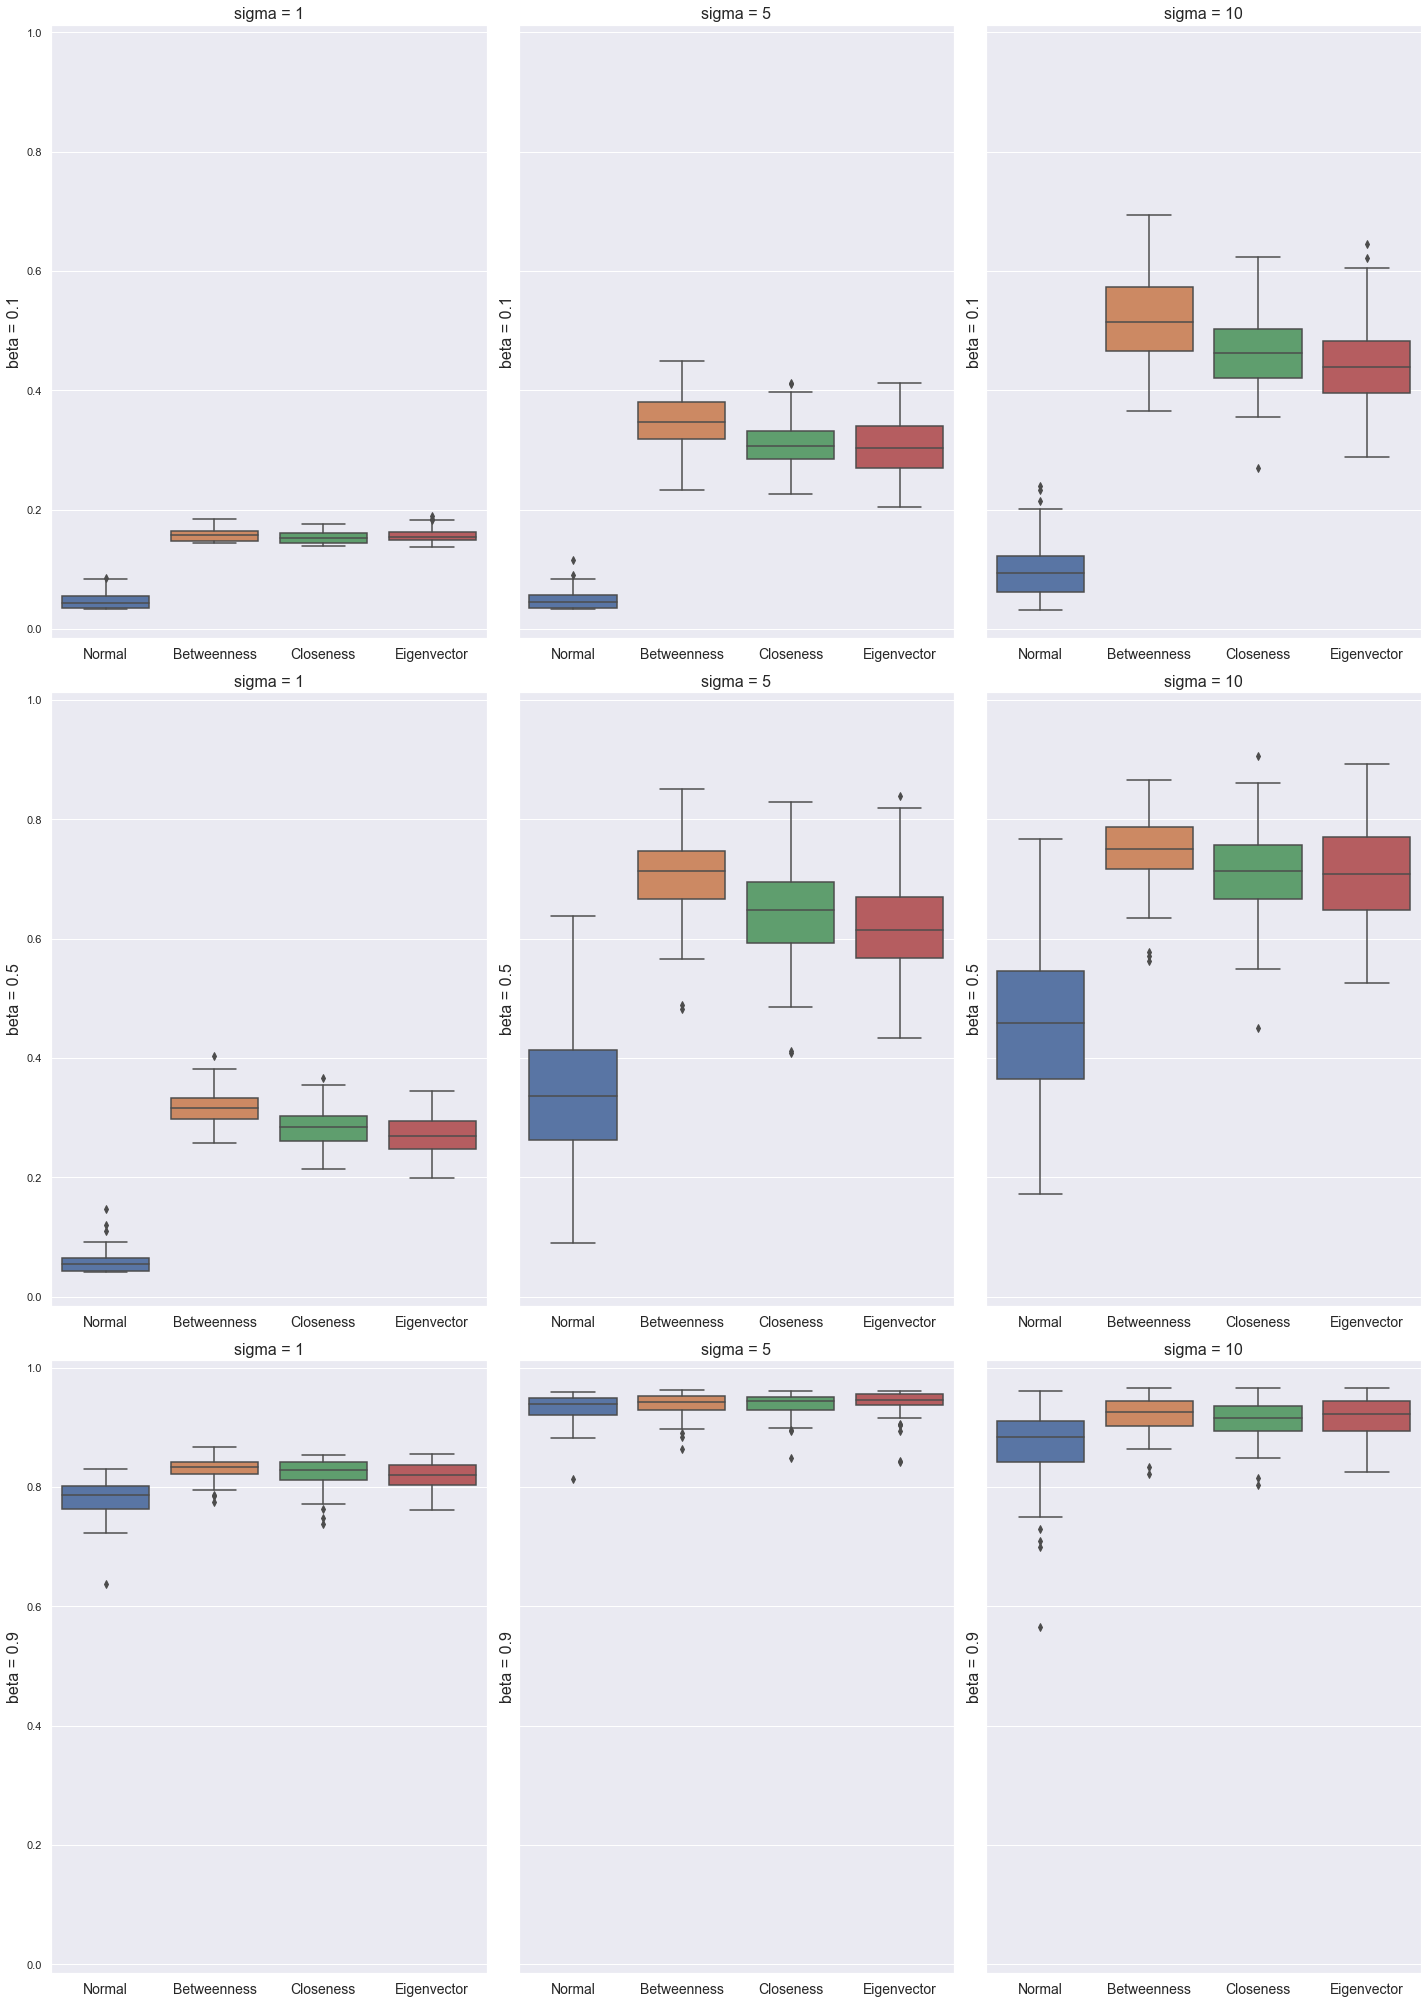

In [26]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=((20,28)), sharey=True)

beta_list = [0.1, 0.5, 0.9]
sigma_list = [1, 5, 10]
for i in range(3):
    for j in range(3):
        temp_df = pd.DataFrame([barabasi_df[(barabasi_df.beta == beta_list[i]) & 
                                            (barabasi_df.sigma == sigma_list[j])].reset_index()['opinion_avg'],
                                interv_barabasi_df[(interv_barabasi_df.beta == beta_list[i]) &
                                                   (interv_barabasi_df.sigma == sigma_list[j]) &                                             
                                                   (interv_barabasi_df.interv_type=="betweenness")
                                                  ].reset_index()['opinion_avg'],
                                interv_barabasi_df[(interv_barabasi_df.beta == beta_list[i]) & 
                                                   (interv_barabasi_df.sigma == sigma_list[j]) & 
                                                   (interv_barabasi_df.interv_type=="closeness")
                                                  ].reset_index()['opinion_avg'],
                                interv_barabasi_df[(interv_barabasi_df.beta == beta_list[i]) & 
                                                   (interv_barabasi_df.sigma == sigma_list[j]) & 
                                                   (interv_barabasi_df.interv_type=="eigen")
                                                  ].reset_index()['opinion_avg']
                               ], index=['Normal', 'Betweenness', 'Closeness', 'Eigenvector']).T
        sns.boxplot(data=temp_df, ax=axes[i,j])
        axes[i,j].set_xticklabels([x.split(sep=" ")[0] for x in temp_df.columns], size=14)
        axes[i,j].set_title("sigma = {}".format(sigma_list[j]), size=16)
        axes[i,j].set_ylabel("beta = {}".format(beta_list[i]), size=16)
        #axes[i,j].set_title("Average Opinion (sigma, beta) = ({}).".format(erdos_opinion_df.columns[i*3+j]), size=14)
fig.tight_layout()


### Small-world

In [27]:
interv_small_df = interv_results_df[interv_results_df.nw_topology == 'small-world']
interv_small_df.head(2)

,run,beta,sigma,population,nw_topology,interv_type,perc-interventions,step,num_social_distancing,num_not_social_distancing,opinion_avg,opinion_std
295,301,0.1,1,100,small-world,eigen,10,826,11,89,0.133194,0.290443
296,302,0.1,1,100,small-world,eigen,10,979,16,84,0.142505,0.302692


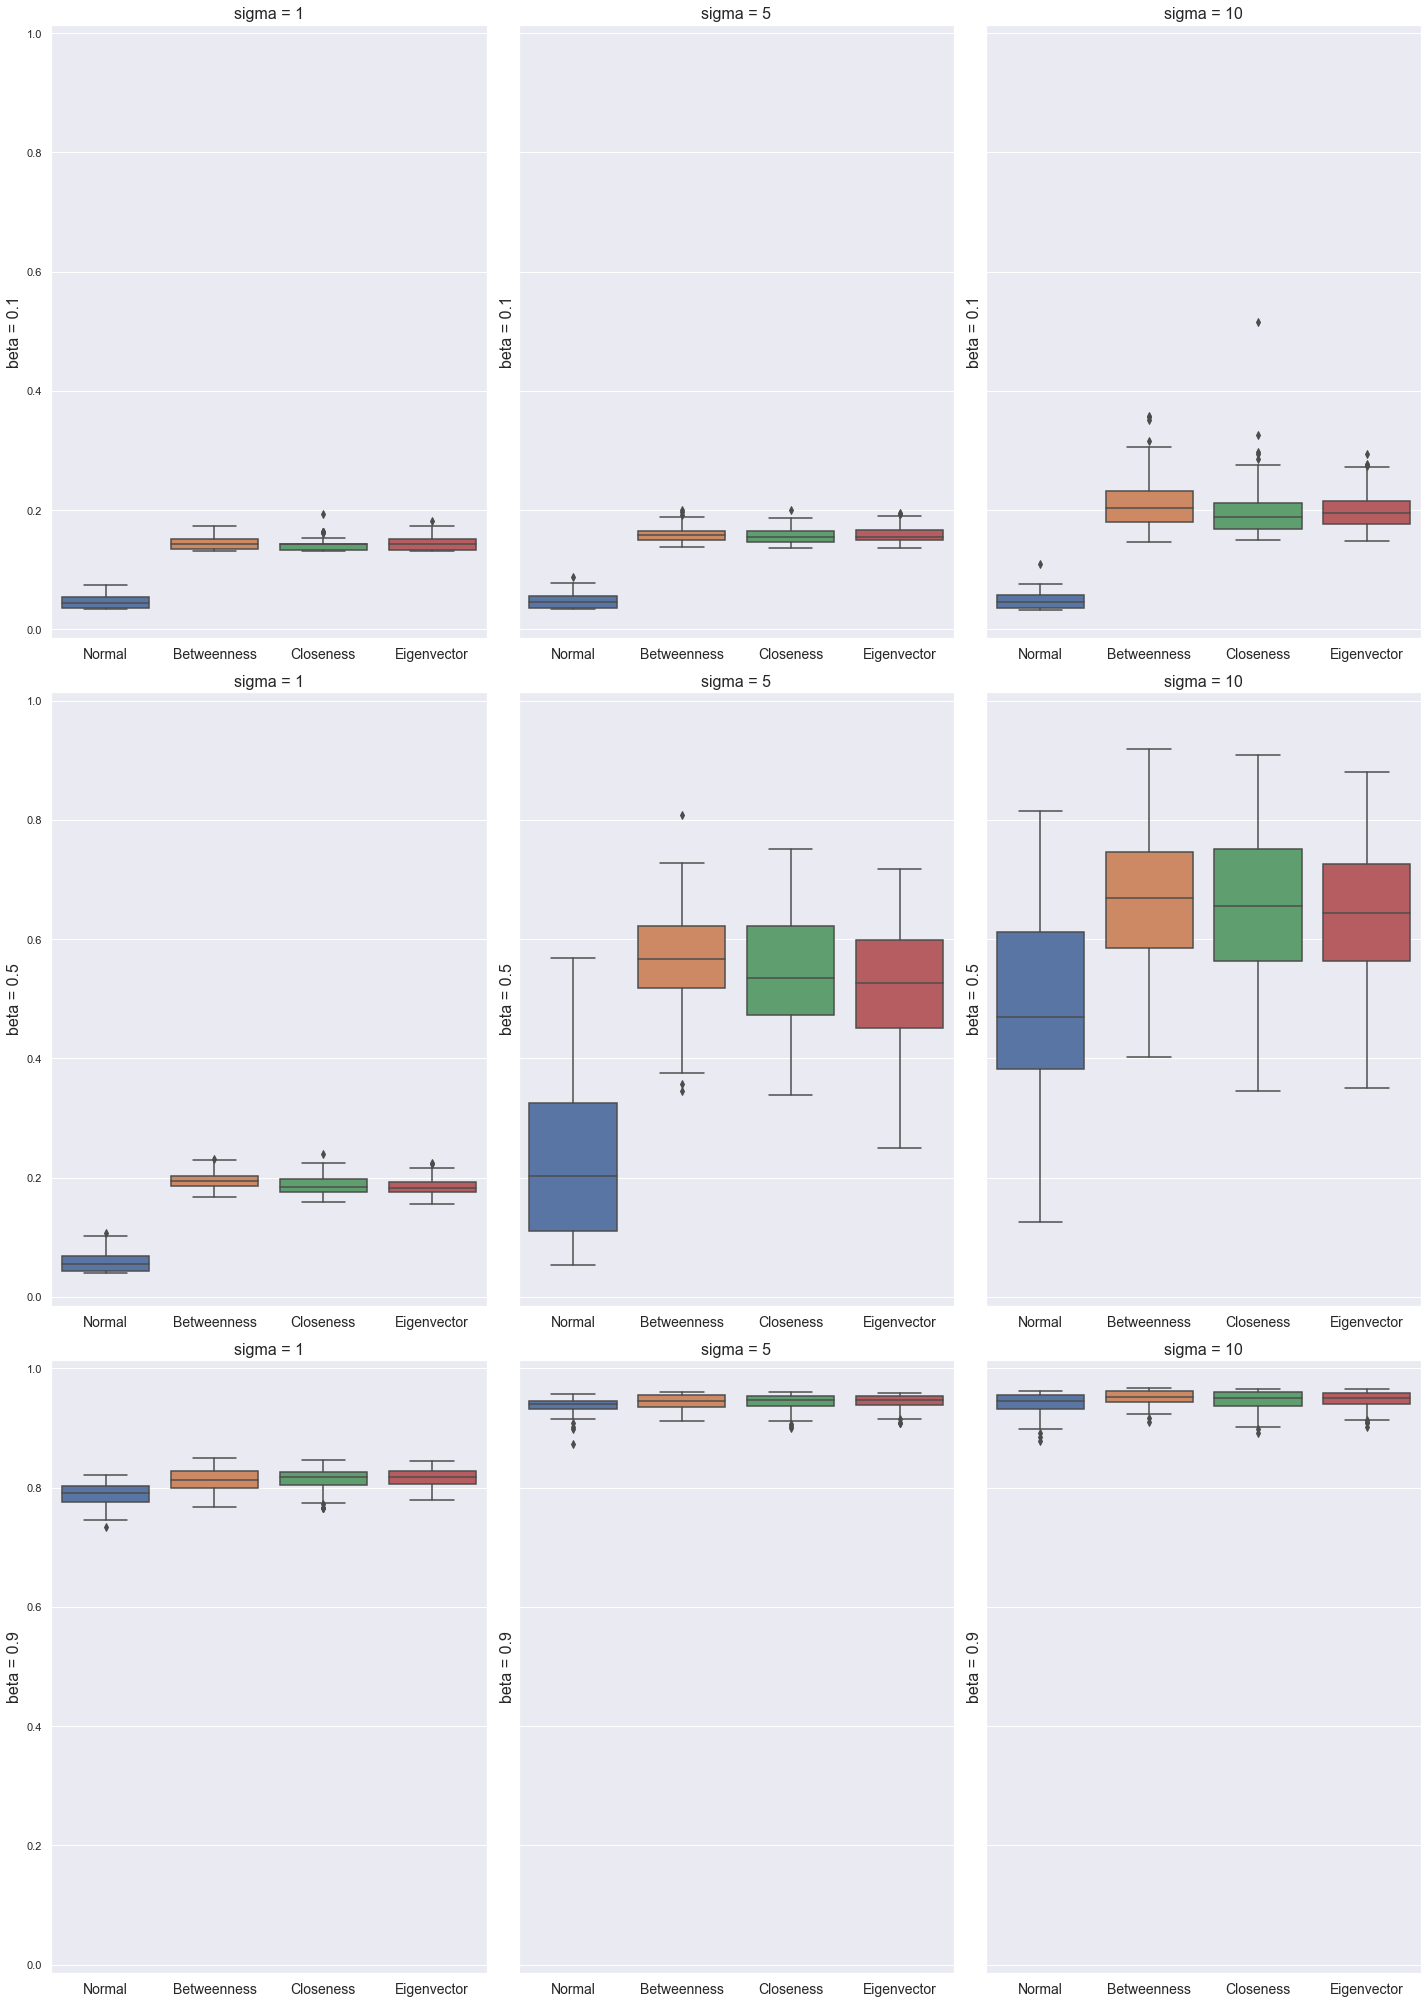

In [28]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=((20,28)), sharey=True)

beta_list = [0.1, 0.5, 0.9]
sigma_list = [1, 5, 10]
for i in range(3):
    for j in range(3):
        temp_df = pd.DataFrame([small_w_df[(small_w_df.beta == beta_list[i]) & 
                                           (small_w_df.sigma == sigma_list[j])].reset_index()['opinion_avg'],
                                interv_small_df[(interv_small_df.beta == beta_list[i]) &
                                                (interv_small_df.sigma == sigma_list[j]) & 
                                                (interv_small_df.interv_type=="betweenness")
                                               ].reset_index()['opinion_avg'],
                                interv_small_df[(interv_small_df.beta == beta_list[i]) & 
                                                (interv_small_df.sigma == sigma_list[j]) & 
                                                (interv_small_df.interv_type=="closeness")
                                               ].reset_index()['opinion_avg'],
                                interv_small_df[(interv_small_df.beta == beta_list[i]) & 
                                                (interv_small_df.sigma == sigma_list[j]) & 
                                                (interv_small_df.interv_type=="eigen")
                                               ].reset_index()['opinion_avg']
                               ], index=['Normal', 'Betweenness', 'Closeness', 'Eigenvector']).T
        sns.boxplot(data=temp_df, ax=axes[i,j])
        axes[i,j].set_xticklabels([x.split(sep=" ")[0] for x in temp_df.columns], size=14)
        axes[i,j].set_title("sigma = {}".format(sigma_list[j]), size=16)
        axes[i,j].set_ylabel("beta = {}".format(beta_list[i]), size=16)
        #axes[i,j].set_title("Average Opinion (sigma, beta) = ({}).".format(erdos_opinion_df.columns[i*3+j]), size=14)
fig.tight_layout()


## Tables

#### Barabasi-Albert

In [29]:
t_df = interv_barabasi_df.groupby(['beta','sigma', 'interv_type']).mean()['opinion_avg'].unstack()
t2_df = barabasi_df.groupby(['beta','sigma']).mean()['opinion_avg'].rename('No intervention')

t_df.join(t2_df)

betweenness  closeness     eigen  No intervention
beta sigma                                                   
0.1  1         0.158027   0.152986  0.155842         0.047217
     5         0.347143   0.307840  0.304918         0.049646
     10        0.520260   0.462284  0.446377         0.098685
0.5  1         0.316087   0.282654  0.271608         0.058125
     5         0.704268   0.643114  0.620842         0.344692
     10        0.748884   0.712171  0.702794         0.453269
0.9  1         0.830661   0.823224  0.818701         0.781734
     5         0.937818   0.937665  0.941277         0.932651
     10        0.921045   0.912609  0.915226         0.867915

#### Erdos-Renyi

In [30]:
t_df = interv_erdos_df.groupby(['beta','sigma', 'interv_type']).mean()['opinion_avg'].unstack()
t2_df = erdos_df.groupby(['beta','sigma']).mean()['opinion_avg'].rename('No intervention')

t_df.join(t2_df)

betweenness  closeness     eigen  No intervention
beta sigma                                                   
0.1  1         0.143619   0.144151  0.142908         0.047589
     5         0.149412   0.148128  0.147807         0.046182
     10        0.161115   0.161341  0.167988         0.047890
0.5  1         0.183190   0.183418  0.184737         0.057378
     5         0.598695   0.574720  0.607053         0.136924
     10        0.717587   0.717546  0.722180         0.444258
0.9  1         0.818694   0.817849  0.818357         0.789490
     5         0.945067   0.947231  0.945258         0.939803
     10        0.948832   0.949010  0.949922         0.945169

#### Small-world

In [31]:
t_df = interv_small_df.groupby(['beta','sigma', 'interv_type']).mean()['opinion_avg'].unstack()
t2_df = small_w_df.groupby(['beta','sigma']).mean()['opinion_avg'].rename('No intervention')

t_df.join(t2_df)

betweenness  closeness     eigen  No intervention
beta sigma                                                   
0.1  1         0.143955   0.143168  0.143372         0.045782
     5         0.158804   0.157016  0.158530         0.046098
     10        0.212977   0.200561  0.199082         0.048772
0.5  1         0.194880   0.188059  0.184778         0.060493
     5         0.566031   0.543462  0.522916         0.231870
     10        0.664429   0.657331  0.644227         0.475925
0.9  1         0.814010   0.813415  0.816560         0.788686
     5         0.943567   0.943575  0.944335         0.937340
     10        0.951309   0.946073  0.947410         0.940899